In [189]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
%config InlineBackend.figure_format = "svg"

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

In [4]:
df.property_type.value_counts()

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Parking Space             1
Casa particular           1
Island                    1
Lighthouse                1
Name: property_type,

# Splits

In [5]:
#df, validation_df  = train_test_split(data,
#                                test_size=0.25,
#                                random_state = 101)

In [6]:
#df_train, df_test  = train_test_split(df,
#                                test_size=0.25,
#                                random_state = 101)

# info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

# Finding missing values

In [8]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

# Date

In [9]:
df["last_review"] = pd.to_datetime(df["last_review"])
df["first_review"] = pd.to_datetime(df["first_review"])
df["host_since"] = pd.to_datetime(df["host_since"])

# Replacing missing values 

In [10]:
df.last_review.fillna(method="ffill",inplace=True)
df.first_review.fillna(method="ffill",inplace=True)
df.host_since.fillna(method="ffill",inplace=True)

# Handling Missing Values 

> #### 1. Bathrooms

In [11]:
df.bathrooms.unique()

array([1. , 1.5, 2. , nan, 2.5, 3. , 0.5, 4.5, 5. , 0. , 4. , 3.5, 5.5,
       7.5, 6. , 8. , 7. , 6.5])

^ It is not logical for the bathrooms to be the flutes numbers, because in fact, for example, there is no bathroom and a half!

In [12]:
df["bathrooms"]=df["bathrooms"].round()

In [13]:
df["bathrooms"].mode()

0    1.0
dtype: float64

In [14]:
df["bathrooms"].mean()

1.2513022418855109

In [15]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].mean()))

In [16]:
#df["bathrooms"] = df['bathrooms'].fillna(df["bathrooms"].mode())

In [17]:
df["bathrooms"].value_counts()

1.0    58299
2.0    13304
3.0     1066
4.0      831
0.0      407
6.0       75
5.0       72
8.0       47
7.0       10
Name: bathrooms, dtype: int64

> #### 2. review

Missing values in column "review_scores_rating" are related to column "number_of_reviews".

In [18]:
df[["number_of_reviews","review_scores_rating"]][df.number_of_reviews == 0]

number_of_reviews  review_scores_rating
3                      0                   NaN
12                     0                   NaN
15                     0                   NaN
24                     0                   NaN
31                     0                   NaN
...                  ...                   ...
74083                  0                   NaN
74089                  0                   NaN
74095                  0                   NaN
74106                  0                   NaN
74109                  0                   NaN

[15819 rows x 2 columns]

In [19]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)

> #### 3. bedrooms

In [20]:
df["bedrooms"].mean()

1.265793028911105

In [21]:
df["bedrooms"].mode()

0    1.0
dtype: float64

In [22]:
#df["bedrooms"] = df['bedrooms'].fillna(df["bedrooms"].mode())

In [23]:
df["bedrooms"] = df["bedrooms"].fillna(1.0)

> #### 4. Beds

In [24]:
df["beds"].mean()

1.710867802108678

In [25]:
df["beds"].mode()

0    1.0
dtype: float64

In [26]:
df["beds"] = df["beds"].fillna(2.0)

> #### 5. host has profile pic

In [27]:
df.host_has_profile_pic

0        t
1        t
2        t
3        t
4        t
        ..
74106    t
74107    t
74108    t
74109    t
74110    t
Name: host_has_profile_pic, Length: 74111, dtype: object

In [28]:
df.host_identity_verified

0        t
1        f
2        t
3        t
4        t
        ..
74106    t
74107    f
74108    t
74109    f
74110    t
Name: host_identity_verified, Length: 74111, dtype: object

the columns host_has_profile_pic and host_identity_verified has boolean values true and false¶


In [29]:
df.replace(to_replace = "t", value = 1,inplace=True) 
df.replace(to_replace = "f", value = 0,inplace=True) 

### Changed the datatype to bool of these two columns:

In [30]:
df["host_has_profile_pic"] = df["host_has_profile_pic"].astype("bool")
df["host_identity_verified"] = df["host_identity_verified"].astype("bool")

> #### 6.host response rate

In [31]:
df.host_response_rate = df.host_response_rate.apply(
    lambda x: int(x[:len(x)-1])/100
     if isinstance(x,str) else x )


df.host_response_rate = df.host_response_rate.fillna(df.host_response_rate.mean())

> #### 7.drob

In [32]:
#id
#description
 ##first_review
 ##last_review
 ##host_since
#host_has_profile_pic
#name
#thumbnail_url
#zipcode
#neighbourhood

In [33]:
df1 = df.drop(['id','description','first_review','last_review','host_since',
                          'host_has_profile_pic','name','thumbnail_url','zipcode','neighbourhood'],axis=1)
df1.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')

In [34]:
df1.isna().sum()

log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
dtype: int64

In [35]:
df1

log_price property_type        room_type  \
0       5.010635     Apartment  Entire home/apt   
1       5.129899     Apartment  Entire home/apt   
2       4.976734     Apartment  Entire home/apt   
3       6.620073         House  Entire home/apt   
4       4.744932     Apartment  Entire home/apt   
...          ...           ...              ...   
74106   4.605170     Apartment     Private room   
74107   5.043425     Apartment  Entire home/apt   
74108   5.220356     Apartment  Entire home/apt   
74109   5.273000     Apartment  Entire home/apt   
74110   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee city  \
0            1.0  Real Bed              strict          True  NYC   
1            1.0  Real Bed              strict          True  NYC   
2            1.0  Real Bed            moderate          True  NYC   
3            1.0  Real Bed            flexible          True   SF   
4            1.0  Real Bed            moderate          True   DC   
...          ...       ...                 ...           ...  ...   
74106        1.0  Real Bed            flexible         False  NYC   
74107        2.0  Real Bed            moderate          True   LA   
74108        1.0  Real Bed            moderate          True  NYC   
74109        1.0  Real Bed              strict          True  NYC   
74110        1.0  Real Bed            moderate         False   LA   

       host_identity_verified  host_response_rate  instant_bookable  \
0                        True             0.94352                 0   
1                       False             1.00000                 1   
2                        True             1.00000                 1   
3                        True             0.94352                 0   
4                        True             1.00000                 1   
...                       ...                 ...               ...   
74106                    True             0.94352                 0   
74107                   False             1.00000                 0   
74108                    True             1.00000                 1   
74109                   False             1.00000                 1   
74110                    True             1.00000                 0   

        latitude   longitude  number_of_reviews  review_scores_rating  \
0      40.696524  -73.991617                  2                 100.0   
1      40.766115  -73.989040                  6                  93.0   
2      40.808110  -73.943756                 10                  92.0   
3      37.772004 -122.431619                  0                   0.0   
4      38.925627  -77.034596                  4                  40.0   
...          ...         ...                ...                   ...   
74106  40.709025  -73.939405                  0                   0.0   
74107  33.871549 -118.396053                 16                  93.0   
74108  40.706749  -73.942377                 43                  94.0   
74109  40.738535  -74.000157                  0                   0.0   
74110  33.761096 -11

> #### 8.amenities

In [36]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))

In [37]:
len(amenities_count)

74111

In [38]:
df1["amenities"] = amenities_count

# 9.Factorization of categorical columns

### 1- room_type

In [39]:
df1.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [40]:
def room_type_cleaning(x):
    if x=='Entire home/apt':
        x= 3
    elif x=='Private room':
        x= 2
    elif x=='Shared room':
        x= 1
    return x
df1['room_type']=df1['room_type'].map(lambda x: room_type_cleaning(x))

In [41]:
#df1.room_type = df1.room_type.apply(lambda x: 3 if x=='Entire home/apt' else 2 if x=='Private room' else 1)

In [42]:
df1.bed_type.unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

### 2- bed_type

In [43]:
df1.bed_type = df.bed_type.map(lambda x: 2 if x=='Real Bed' else 1)

In [44]:
df1

log_price property_type  room_type  amenities  accommodates  bathrooms  \
0       5.010635     Apartment          3        152             3        1.0   
1       5.129899     Apartment          3        218             7        1.0   
2       4.976734     Apartment          3        311             5        1.0   
3       6.620073         House          3        210             4        1.0   
4       4.744932     Apartment          3        174             2        1.0   
...          ...           ...        ...        ...           ...        ...   
74106   4.605170     Apartment          2          2             1        1.0   
74107   5.043425     Apartment          3        224             4        2.0   
74108   5.220356     Apartment          3        402             5        1.0   
74109   5.273000     Apartment          3        189             2        1.0   
74110   4.852030          Boat          3        279             4        1.0   

       bed_type cancellation_policy  cleaning_fee city  \
0             2              strict          True  NYC   
1             2              strict          True  NYC   
2             2            moderate          True  NYC   
3             2            flexible          True   SF   
4             2            moderate          True   DC   
...         ...                 ...           ...  ...   
74106         2            flexible         False  NYC   
74107         2            moderate          True   LA   
74108         2            moderate          True  NYC   
74109         2              strict          True  NYC   
74110         2            moderate         False   LA   

       host_identity_verified  host_response_rate  instant_bookable  \
0                        True             0.94352                 0   
1                       False             1.00000                 1   
2                        True             1.00000                 1   
3                        True             0.94352                 0   
4                        True             1.00000                 1   
...                       ...                 ...               ...   
74106                    True             0.94352                 0   
74107                   False             1.00000                 0   
74108                    True             1.00000                 1   
74109                   False             1.00000                 1   
74110                    True             1.00000                 0   

        latitude   longitude  number_of_reviews  review_scores_rating  \
0      40.696524  -73.991617                  2                 100.0   
1      40.766115  -73.989040                  6                  93.0   
2      40.808110  -73.943756                 10                  92.0   
3      37.772004 -122.431619                  0                   0.0   
4      38.925627  -77.034596                  4                  40.0   
...          ...         ...                ...                   ...   
74106  40.709025  -73.939405                  0                   0.0   
74107  33.871549 -118.396053                 16                  93.0   
74108  40.706749  -73.942377                 43                  94.0   
74109  40.738535  -74.000157                  0                   0.0   
74110  33.761096 -118.192409                205                  96.0   

       bedrooms  beds  
0           1.0   1.0  
1           3.0   3.0  
2           1.0   3.0  
3           2.0   2.0  
4           0.0   1.0  
...         ...   ...  
74106       1.0   1.0  
74107       2.0   4.0  
74108       2.0   2.0  
74109       0.0   2.0  
74110       1.0   2.0  

[74111 rows x 19 columns]

### 3- city

In [45]:
df1 = pd.concat([df1, pd.get_dummies(df1['city'], prefix='city')],axis=1)

In [46]:
#df1 = df1.drop(['city'],axis=1)

## 4- property_type

In [48]:
#dict1 = {'Apartment':['Condominium','Timeshare','Loft','Serviced apartment','Guest suite'],
         'House':['Vacation home','Villa','Townhouse','In-law','Casa particular'],
         'Hotel1':['Dorm','Hostel','Guesthouse'],
    'Hotel2':['Boutique hotel','Bed & Breakfast'],
         'Other':['Island','Castle','Yurt','Hut','Chalet','Treehouse',
                  'Earth House','Tipi','Cave','Train','Parking Space','Lighthouse',
                 'Tent','Boat','Cabin','Camper/RV','Bungalow']
                
                }
#dict2 = {i : k for k, v in dict1.items() for i in v}
#df1['property_type'].replace(dict2).value_counts()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [51]:
df1.property_type.value_counts()

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Parking Space             1
Casa particular           1
Island                    1
Lighthouse                1
Name: property_type,

In [54]:
def property_type(x):
    if x<=100 :
        x= 'others'
  
    return x
df1['property_type']=df1['property_type'].map(lambda x: room_type_cleaning(x))

In [55]:
df1 = pd.concat([df1, pd.get_dummies(df1['property_type'], prefix='property_type')],axis=1)

In [56]:
df1.head(2)

log_price property_type  room_type  amenities  accommodates  bathrooms  \
0   5.010635     Apartment          3        152             3        1.0   
1   5.129899     Apartment          3        218             7        1.0   

   bed_type cancellation_policy  cleaning_fee city  ...  \
0         2              strict          True  NYC  ...   
1         2              strict          True  NYC  ...   

   property_type_Serviced apartment  property_type_Tent  \
0                                 0                   0   
1                                 0                   0   

   property_type_Timeshare  property_type_Tipi  property_type_Townhouse  \
0                        0                   0                        0   
1                        0                   0                        0   

   property_type_Train  property_type_Treehouse  property_type_Vacation home  \
0                    0                        0                            0   
1                    0                        0                            0   

   property_type_Villa  property_type_Yurt  
0                    0                   0  
1                    0                   0  

[2 rows x 60 columns]

In [64]:
nbh_counts = df.property_type.value_counts()
nbh_counts

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Parking Space             1
Casa particular           1
Island                    1
Lighthouse                1
Name: property_type,

In [67]:
other_nbhs = list(nbh_counts[nbh_counts <= 100].index)



df1['property_type'] = df1['property_type'].replace(other_nbhs, 'Other')
df1 = pd.concat([df1, pd.get_dummies(df1['property_type'], prefix='property_type')],axis=1)



In [70]:
df1.property_type.value_counts()

Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Loft                1244
Other               1233
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Villa                179
Dorm                 142
Guest suite          123
Name: property_type, dtype: int64

In [71]:
df1 = df1.drop(['property_type'],axis=1)

## 5-cancellation_policy

In [ ]:
def cancellation_policy_cleaning(x):
    if x=='super_strict_60':
        x= 5
    elif x=='super_strict_30':
        x= 4
    elif x=='strict':
        x= 3
    elif x=='moderate':
        x= 2
    elif x=='flexible':
        x= 1     
    return x
df1['cancellation_policy']=df1['cancellation_policy'].map(lambda x: cancellation_policy_cleaning(x))

## 6-cleaning_fee and host_identity_verified

In [ ]:
df1.replace(to_replace = True , value = 1,inplace=True) 
df1.replace(to_replace = False , value =0,inplace=True)

In [ ]:
df1.isnull().sum()

# Visualization


In [139]:
def pie_col(column):
  df[column].value_counts().plot.pie(autopct='%1.0f%%')

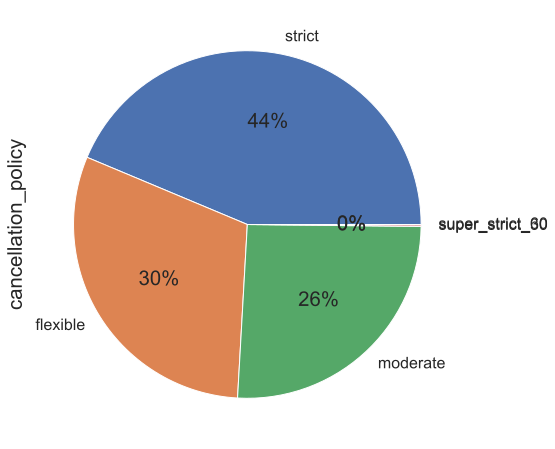

In [146]:
plt.figure(figsize = (10,8))
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 17

pie_col('cancellation_policy')

In [170]:
#pie_col('city')
#plt.figure(figsize = (15,10))

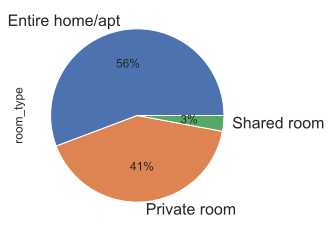

In [142]:
pie_col('room_type')

In [92]:
#def explore_col(column):
 # bar_plot_object(column+" histogram",df1[column])
 # print(column,'description\n', df1[column].describe())
 # print('Top 5 frequent:',df1[column].value_counts()[:5].index.tolist())

In [93]:
#def bar_plot_object(title,df1):
 # x = list(df1.value_counts().keys())
 # x = x[::-1]
 # y = list(df1.value_counts())
  #y = y[::-1]
#  plt.barh(x,y)
#  plt.title(title)
#  return None

In [95]:
#explore_col('city')

In [154]:
#df.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20));

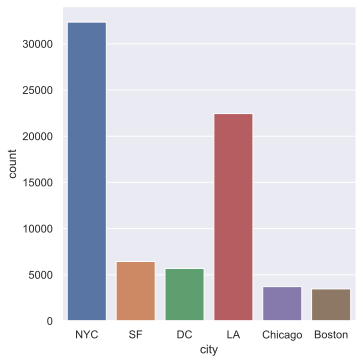

In [111]:
sns.set(font_scale=1)
sns.catplot(x = "city", kind="count", data=df1,height=5);

<BarContainer object of 10 artists>

<Figure size 720x720 with 0 Axes>

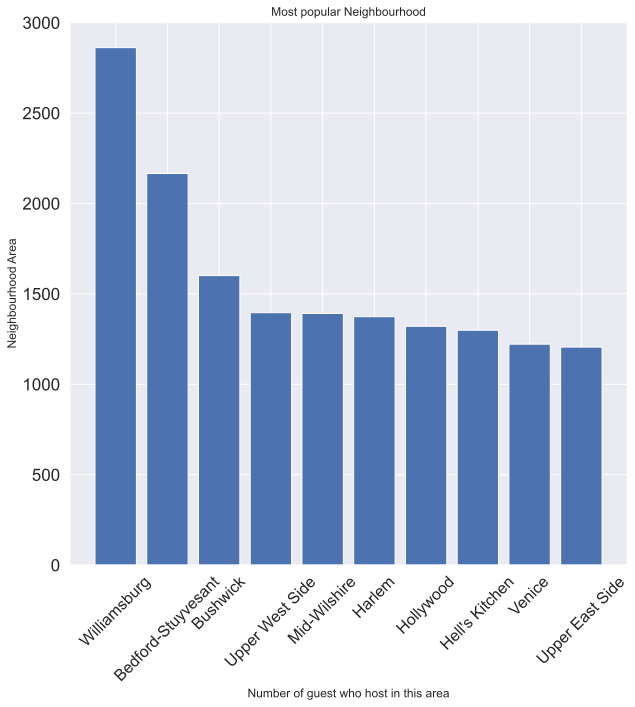

In [143]:
plt.figure(figsize = (10,10))
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(10,10))
x = data.index
y = data.values


plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")
plt.xticks(rotation=45)
plt.bar(x,y )

C:\Users\Techno Link\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


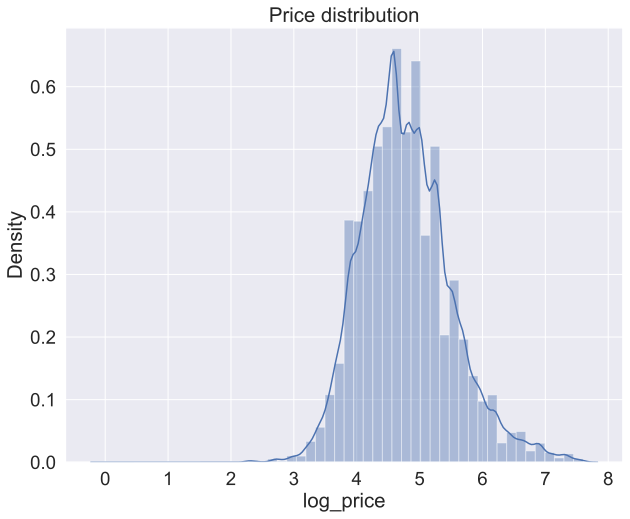

In [157]:
plt.figure(figsize = (10, 8))
sns.distplot(df['log_price'])
plt.title('Price distribution')
plt.show()





<AxesSubplot:>

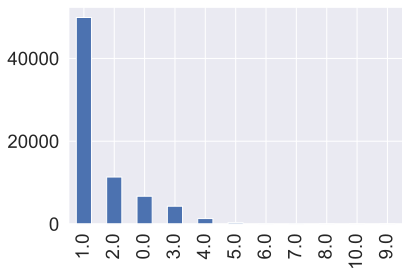

In [160]:
df1.bedrooms.value_counts().plot.bar()

<AxesSubplot:>

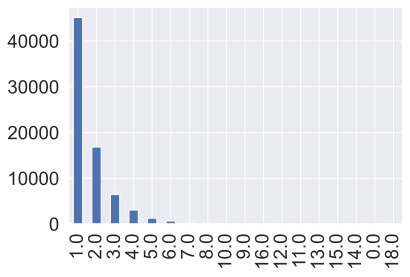

In [162]:
df1.beds.value_counts().plot.bar()

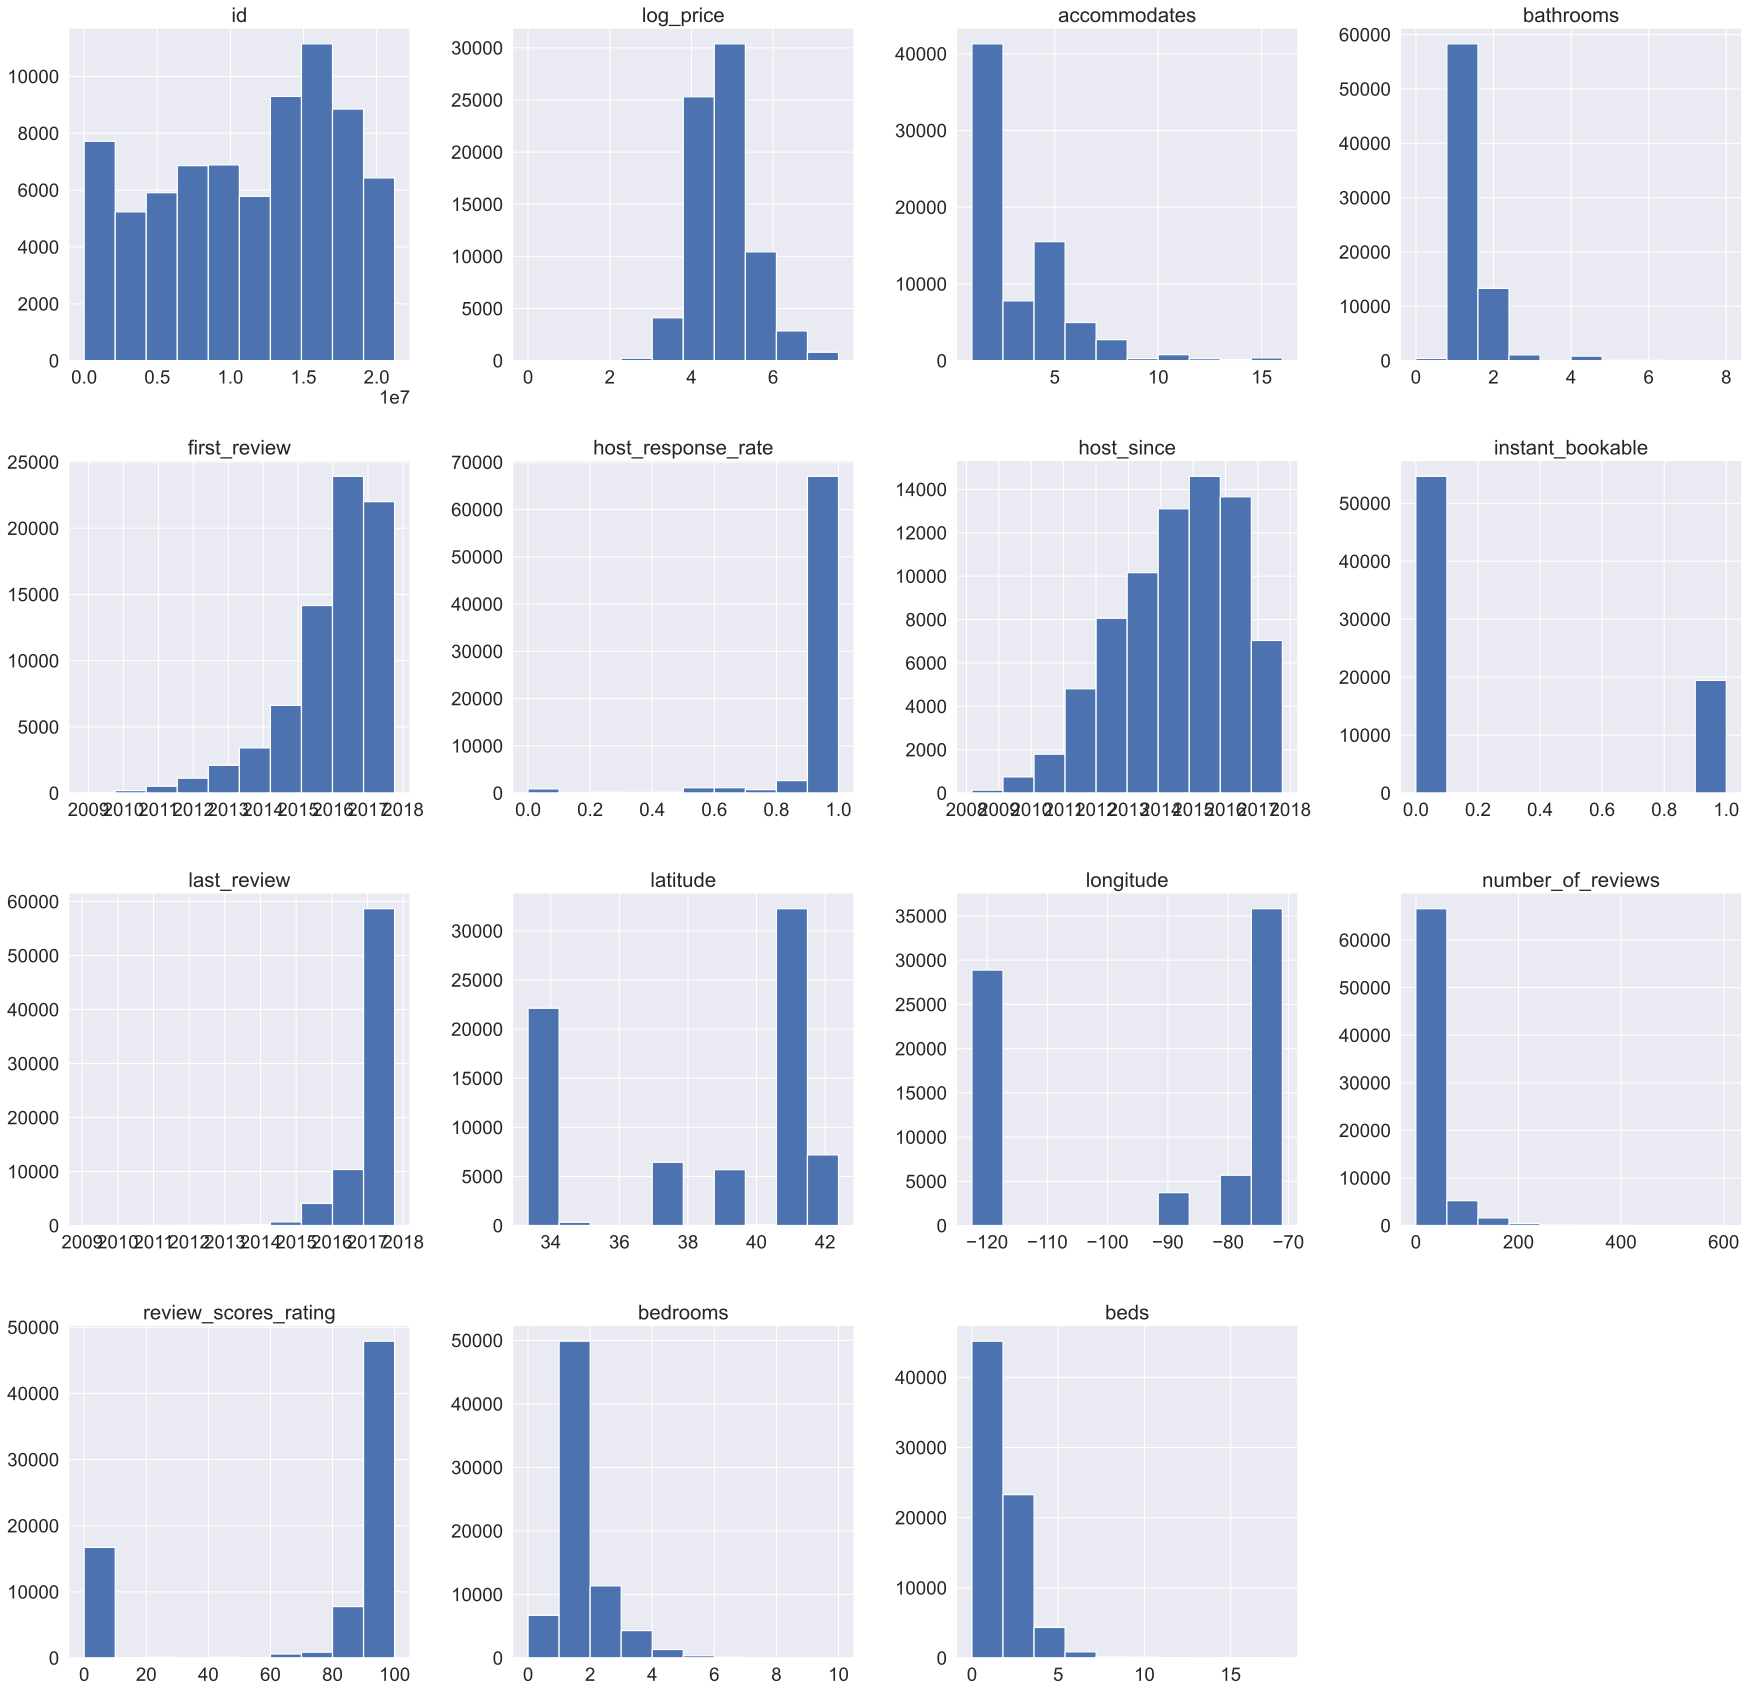

In [187]:
df.hist( linewidth=1.2, figsize=(30, 30));

In [244]:
fig = px.choropleth(df.rename(columns={'log_price':'log price'}), 
                    locations='city',
                    locationmode = 'country names',
                    color='city', 
                   
                    animation_frame='host_response_rate'
                   )
fig.update_layout(geo=dict(
                  showframe = False,
                  showcoastlines = False)
                )
fig.show()

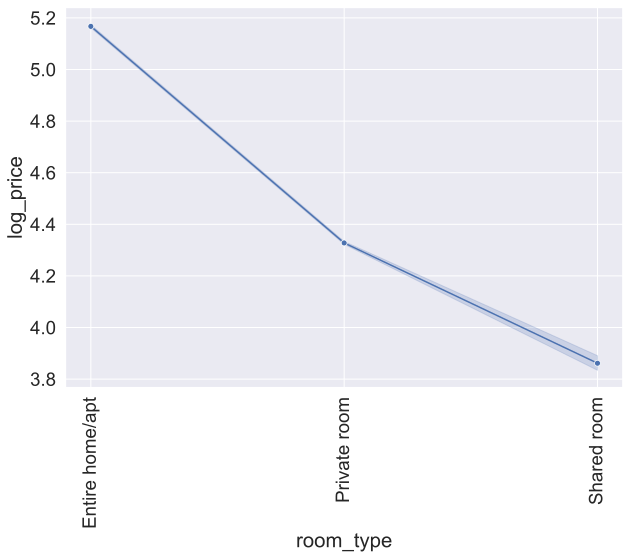

In [219]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df,x="room_type",y="log_price",marker='o')
plt.title("")
plt.xticks(rotation=90)
plt.show()

In [233]:
merged.plot(column='city', cmap='city', linewidth=0.8, ax=ax, edgecolor='0.8')

NameError: name 'merged' is not defined